In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# As the dataset contains values as `?` so we will encode `?` as NaN values
df[df=='?']= np.NaN

In [6]:
# Checking the total null values in each column
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
# Checking the percentage of Null Values in each column
(df.isnull().sum())/len(df)*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [8]:
# We will impute the nul values by mode as all the variables are categorical
for i in ['workclass', 'occupation', 'native.country']:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [9]:
# Checking the Null Values after imputation
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

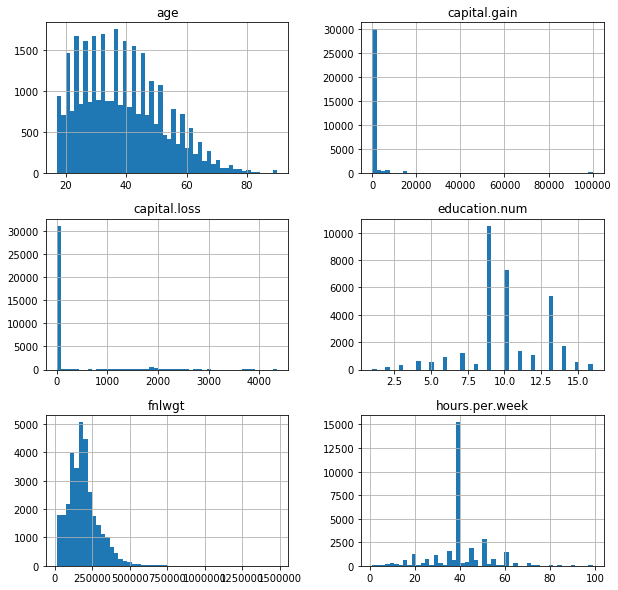

In [11]:
df.hist(bins=50, figsize = (10,10))
plt.show()

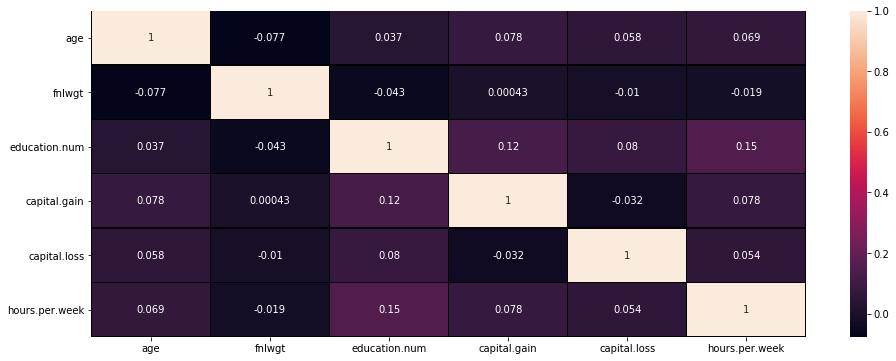

In [12]:
plt.figure(figsize = (16,6))
sns.heatmap(df.corr(), linewidths = .5, linecolor = 'black', annot = True)

In [13]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


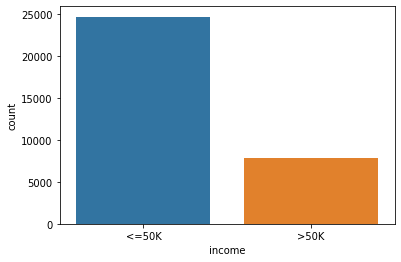

In [14]:
sns.countplot(x = 'income',data = df)

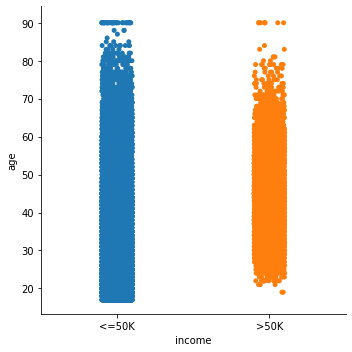

In [15]:
sns.catplot(x= 'income' , y = 'age' ,data = df )

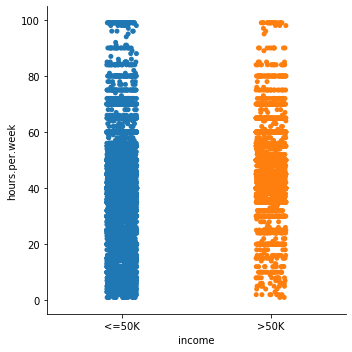

In [16]:
sns.catplot(x= 'income' , y = 'hours.per.week' ,data = df )

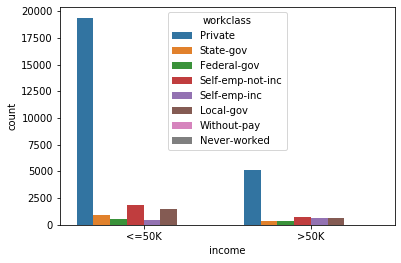

In [17]:
sns.countplot(x = 'income', hue = 'workclass', data = df)

In [18]:
# combining all lower grades in 1 value of school
df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

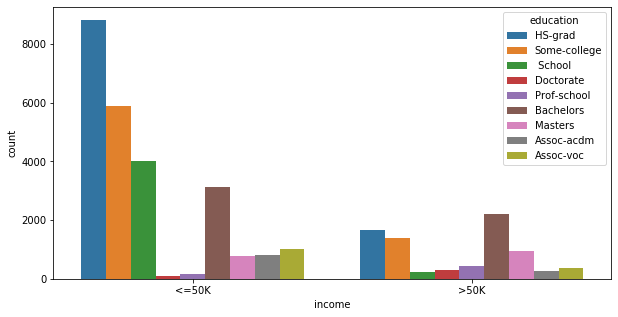

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'income', hue = 'education', data = df)

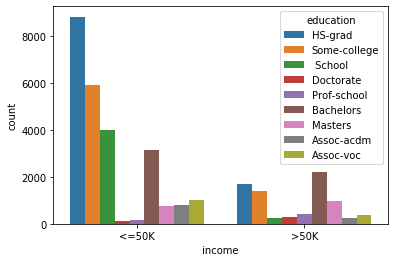

In [20]:
sns.countplot(x = 'income', hue = 'education', data = df)

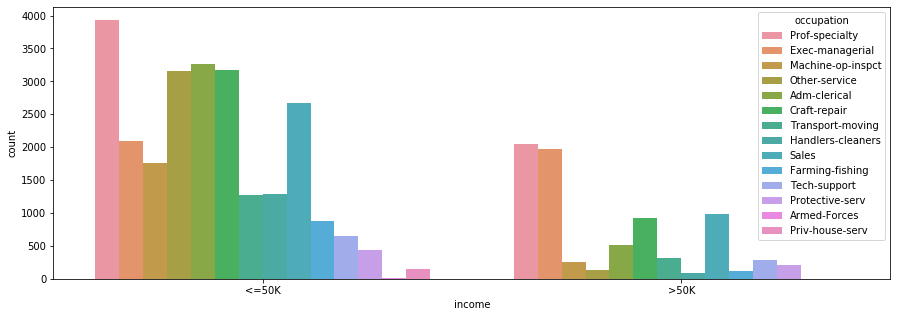

In [21]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'income', hue = 'occupation', data = df)

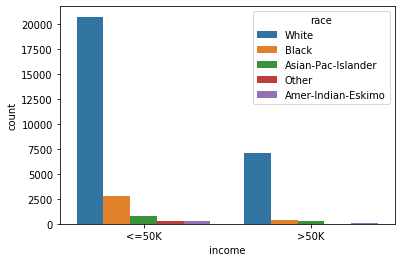

In [22]:
sns.countplot(x = 'income', hue = 'race', data = df)

In [23]:
# Majority of the race data is falling under while so we will combine other values 
df['race'].unique()
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [24]:
df['race'].unique()

array(['White', ' Other'], dtype=object)

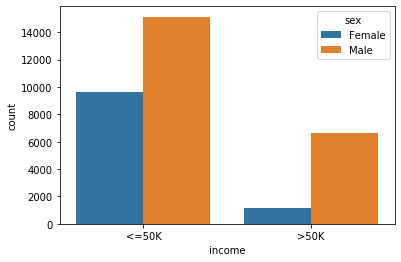

In [25]:
sns.countplot(x = 'income', hue = 'sex', data = df)

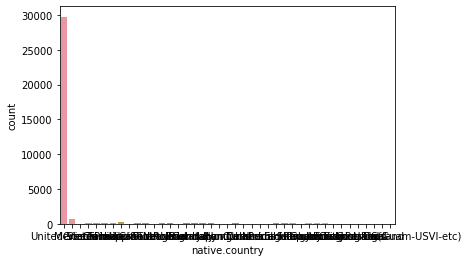

In [26]:
sns.countplot(x = 'native.country', data = df)

In [27]:
df['native.country'].replace(['Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], 'others' , inplace = True)

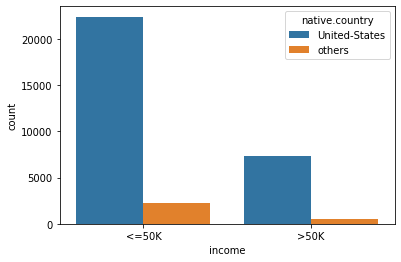

In [28]:
sns.countplot(x = 'income', hue = 'native.country', data = df)

In [29]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [30]:
df['income'] = df['income'].map({'<=50K': 0 ,'>50K' : 1 })

In [31]:
x = df.drop(['income'] , axis = 1)

In [32]:
x.shape

(32561, 13)

In [33]:
y = df['income']

In [34]:
y.shape

(32561,)

In [35]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (26048, 13)
Shape of y_train =  (26048,)
Shape of x_test =  (6513, 13)
Shape of y_test =  (6513,)


In [36]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
cat_var = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for i in cat_var:
    le = LabelEncoder()
    x_train[i] = le.fit_transform(x_train[i])
    x_test[i] = le.transform(x_test[i])

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [40]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [41]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [43]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.828036235221864


Cross_Val_Score =  0.8043875396982463


roc_auc_score =  0.7421491351272689


classification_report
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4966
           1       0.66      0.58      0.62      1547

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513



[[4498  468]
 [ 652  895]]
*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random

In [44]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
print(result.sort_values(by = 'Accuracy_score',ascending=True))

                        Model  Accuracy_score  Cross_val_score  Roc_auc_curve
4                  GaussianNB       79.978505        80.131346      63.083167
2          LogisticRegression       80.208813        80.423322      63.033925
3      DecisionTreeClassifier       81.974513        80.516171      75.184363
0        KNeighborsClassifier       82.803624        80.438754      74.214914
1                         SVC       83.248887        82.127567      69.500164
7        ExtraTreesClassifier       84.768924        84.400450      76.126737
8          AdaBoostClassifier       86.104714        85.874422      76.980442
6  GradientBoostingClassifier       86.442500        86.488508      77.001679
5      RandomForestClassifier       86.503915        85.413828      78.221317


### As we can see from above trials the best performance is given by RandomForestClassifier so it is the final model selected

In [46]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(RFC,'Income.pkl')

['Income.pkl']